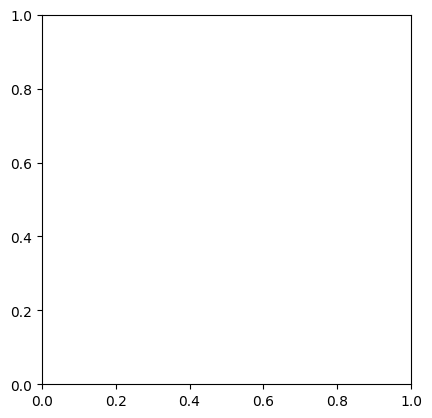

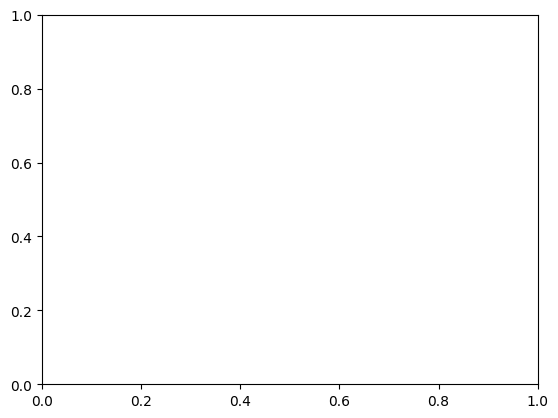

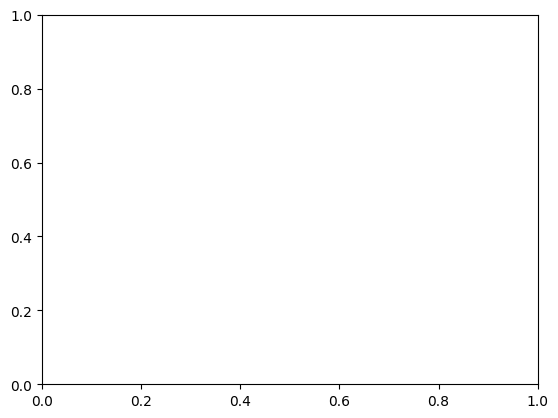

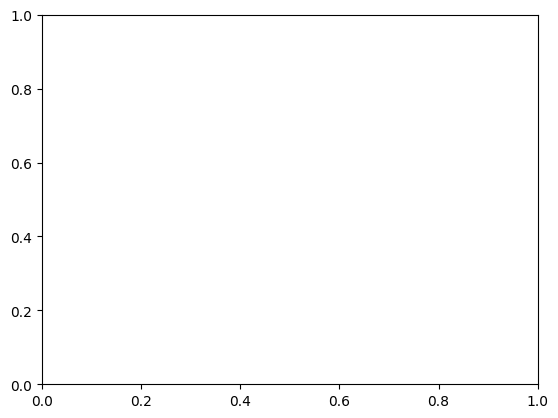

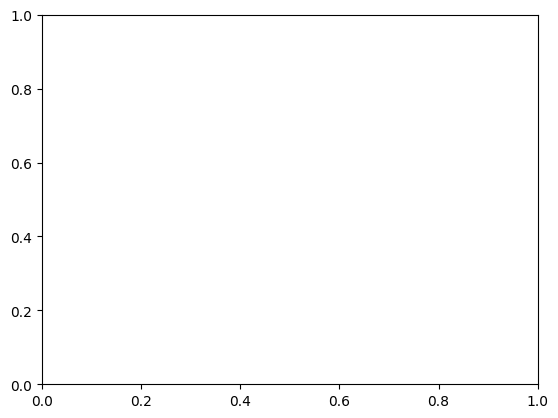

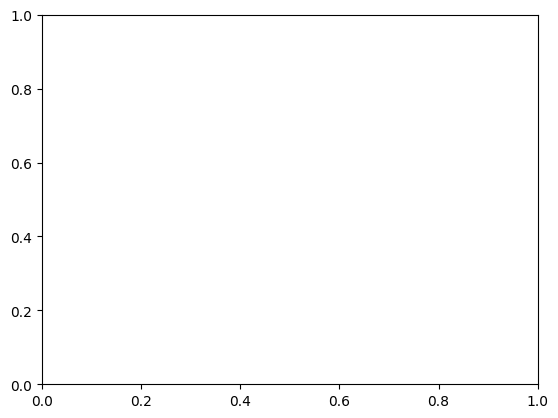

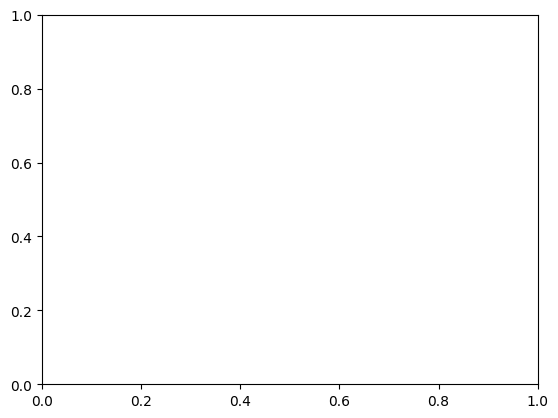

In [1]:
import argparse
import logging
import os
import random
import pickle

import numpy as np
import pandas as pd
import torch
from expt.expt_5 import run_expt_5
from expt.expt_config import ExptConfig
from utils.helpers import make_logger

from types import SimpleNamespace
from utils.funcs import lp_dist

In [2]:
# with open('results/run_0/expt_5/mlp_synthesis_lime_roar.pickle', 'rb') as f:
with open('results/run_0/expt_5/lr_german_alg1_lamb0.1.pickle', 'rb') as f:
    results = pickle.load(f)

/Users/kk985/PhD/Research/robust-bayesian-recourse/.env/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io

In [4]:
results.keys()

dict_keys(['params', 'delta_max_df', 'cost', 'cur_vald', 'fut_vald', 'wc_vald', 'feasible', 'x_0', 'x_r', 'theta_0'])

In [54]:
results

{'params': <sklearn.model_selection._search.ParameterGrid at 0x16cfb3e30>,
 'delta_max_df': 0.2,
 'cost': [array([0.01284141, 2.92801871, 0.68097807, 0.78936596, 2.24745218,
         1.70110289, 0.36392804, 0.23440023, 1.7097208 , 0.19048974,
         2.40236697, 1.40059728, 0.82862451, 3.72709524, 2.44579771,
         1.33101394, 2.7166334 , 2.35474162, 3.11703687, 1.84009486,
         2.45073277, 2.65674349, 0.67510529, 0.41021291, 1.67882397,
         2.88759478, 3.29570342, 0.66170368, 0.91150086, 0.67019697,
         2.47960021, 1.7496136 , 2.01669764, 1.58638965, 0.78527678,
         1.07473696, 1.67185467, 1.3907148 , 1.53777538, 2.54181165,
         2.18157477, 2.95518726, 1.90669206, 1.17876373, 0.48082329,
         0.28162603, 3.17577739, 2.08360372, 2.24134199, 2.45745968,
         2.04060851, 2.92263447, 0.87362825, 3.34076566, 0.79639743,
         2.23905082, 1.27844082, 2.68287586, 2.77153097, 2.56961748,
         2.49452165, 1.78747652, 0.36286006, 3.750483  , 0.1150101 

In [ ]:
args = SimpleNamespace()
args.run_id = 0
args.seed = 124
args.datasets = 'synthesis'
args.methods = 'rbr'
args.classifiers = 'mlp'
args.num_proc = 32
args.rerun = 1
args.plot_only = False
args.start_index = None
args.num_ins = None
args.device = 'cpu'

In [ ]:
np.random.seed(args.seed - 1)
torch.manual_seed(args.seed - 2)
random.seed(args.seed - 3)
np.set_printoptions(suppress=True)

ec = ExptConfig()

In [ ]:
save_dir = f"results/run_{args.run_id}"
ept = 1
ept_dir = os.path.join(save_dir, f"expt_{ept}")
logger = make_logger(f"expt_{ept}", ept_dir)

run_expt_5(
    ec,
    ept_dir,
    datasets=args.datasets,
    methods=args.methods,
    rerun=args.rerun,
    classifiers=args.classifiers,
    num_proc=args.num_proc,
    plot_only=args.plot_only,
    seed=args.seed,
    logger=logger,
    start_index=args.start_index,
    num_ins=args.num_ins,
    device=args.device,
)


In [7]:
res = pd.read_pickle('results/run_0/expt_5/mlp_synthesis_rbr.pickle')

In [12]:
all([all(f) for f in res['feasible']])

True

In [37]:
import matplotlib.colors as mcolors

In [26]:
columns = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'UrbanRural', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
'New', 'RealEstate', 'Portion', 'Recession', 'Default']
df_sba = pd.read_csv('data/SBAcase.11.13.17.csv')

In [31]:
df1 = df_sba[df_sba["ApprovalFY"]<2006][columns]
df2 = df_sba[df_sba["ApprovalFY"]>=2006][columns]

df1.to_csv('data/sba_8905.csv', index=False)
df2.to_csv('data/sba_0614.csv', index=False)

In [3]:
columns = ['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'SeriousDlqin2yrs']
df_gmc_test = pd.read_csv('data/GiveMeSomeCredit testing.csv', index_col=0)
df_gmc_train = pd.read_csv('data/GiveMeSomeCredit training.csv', index_col=0)

In [5]:
df_gmc_train[columns].iloc[:1000].to_csv('data/gmc.csv', index=False)
df_gmc_test[columns].iloc[:1000].to_csv('data/gmc_shift.csv', index=False)

In [1]:
import torch

In [19]:
torch.manual_seed(0)
x_0 = torch.tensor([1.2, 3.4])
x_0 +torch.rand(x_0.size())

tensor([1.6963, 4.1682])